<h1>코로나19 사태로 인한 배달 산업의 변화</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.plotting.backend = 'plotly'
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import plotly.express as px

In [2]:
delivery = pd.read_csv('delivery.csv')

<h3>배달 음식 중 어느 것을 가장 많이 시켜먹는지 시각화 해보겠습니다</h3>

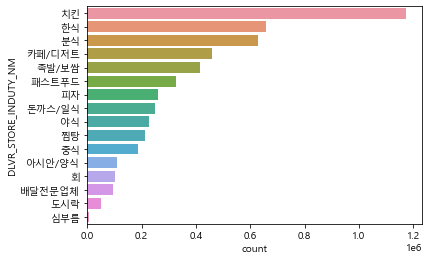

In [36]:
plt.rc('font', family = 'Malgun Gothic')
sns.countplot(y = 'DLVR_STORE_INDUTY_NM',data = delivery, order = delivery['DLVR_STORE_INDUTY_NM'].value_counts(ascending = False).index)

<h3>어느 지역이 배달 음식을 가장 많이 시켜먹는지 시각화 해보겠습니다</h3>

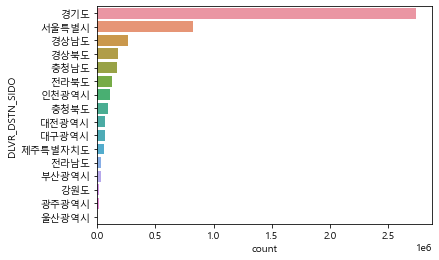

In [37]:
plt.rc('font', family = 'Malgun Gothic')
sns.countplot(y = 'DLVR_DSTN_SIDO', data = delivery, order = delivery['DLVR_DSTN_SIDO'].value_counts(ascending = False).index)

<h3>코로나 확진자가 발생한 1월부터의 배달 횟수가 어떻게 변화하였는지 확인해보겠습니다.</h3>

<h4>우선 날짜를 datetime형으로 바꾼 후 월만 남기고 제거하겠습니다</h4>

In [3]:
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'], format = '%Y-%m-%d %H:%M:%S')
delivery['Date1'] = delivery['DLVR_RCEPT_TIME'].dt.month
delivery['Date1']

0          1
1          1
2          1
3          1
4          1
          ..
5158320    6
5158321    6
5158322    6
5158323    6
5158324    6
Name: Date1, Length: 5158325, dtype: int64

In [4]:
counts = delivery['Date1'].value_counts().sort_index()
counts = list(counts)
counts

[824058, 895861, 971132, 967309, 1023593, 476372]

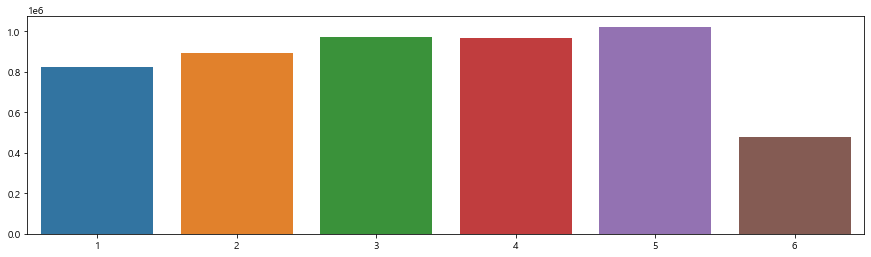

In [40]:
plt.figure(figsize = (15,4))
sns.barplot(x = [1,2,3,4,5,6], y = counts)

<h3>6월의 데이터는 6월 21일까지의 데이터만 있으므로 6월을 제외하고 보면 점점 배달량이 증가하고있는 것을 볼 수 있습니다.</h3>

<h2>배달 소요 시간의 변화를 월별로 시각해보겠습니다.</h2>

In [5]:
delivery['DLVR_COMPT_TIME'] = pd.to_datetime(delivery['DLVR_COMPT_TIME'], errors = 'coerce')
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'], errors = 'coerce')

In [6]:
delivery['time']=delivery['DLVR_COMPT_TIME']-delivery['DLVR_RCEPT_TIME']

In [43]:
delivery['time']

0         00:25:48
1         00:19:30
2         00:17:33
3         00:35:14
4         00:23:54
            ...   
5158320   00:19:25
5158321   00:21:05
5158322   00:19:37
5158323   00:14:32
5158324   00:23:32
Name: time, Length: 5158325, dtype: timedelta64[ns]

In [44]:
delivery['time'].describe()

count                   5055084
mean     0 days 00:17:22.145188
std      0 days 00:12:55.819661
min             0 days 00:00:06
25%             0 days 00:10:52
50%             0 days 00:15:35
75%             0 days 00:21:25
max             0 days 20:48:44
Name: time, dtype: object

<h3>
    describe를 해본 결과 min 값이 6초이고 max값이 20시간인 것을 보니 이상치가 존재하는 것을 알 수 있습니다.<br>
    이상치를 제거하고 그래프를 그리기 위해 time 값을 분 단위로 나누어서 실수형으로 바꾸겠습니다
</h3>

In [7]:
delivery['time1'] = delivery['time'] / np.timedelta64(1, 'm')
delivery['time1']

0          25.800000
1          19.500000
2          17.550000
3          35.233333
4          23.900000
             ...    
5158320    19.416667
5158321    21.083333
5158322    19.616667
5158323    14.533333
5158324    23.533333
Name: time1, Length: 5158325, dtype: float64

<h3>이상치를 제거하기 위해 10분 보다 작은 값들과 2시간보다 큰 값듣은 제외해 주도록 하게습니다.</h3>

In [10]:
time_mean = delivery['time1'].mean()
time_std = delivery['time1'].std()
indexNames = delivery[delivery['time1'] < 10].index
delivery.drop(indexNames , inplace=True)
indexNames = delivery[delivery['time1'] > 120].index
delivery.drop(indexNames , inplace=True)

In [11]:
delivery['time1']

0          25.800000
1          19.500000
2          17.550000
3          35.233333
4          23.900000
             ...    
5158320    19.416667
5158321    21.083333
5158322    19.616667
5158323    14.533333
5158324    23.533333
Name: time1, Length: 4107295, dtype: float64

In [12]:
delivery['time1'].min()

10.0

In [13]:
delivery['time1'].max()

119.96666666666667

<h3>최솟값은 10분이고 최댓값은 119분 인 것을 알 수 있습니다.</h3>

<h3>이상치를 제거한 월별 배달 평균 소요시간을 그려보겠습니다.</h3>

In [15]:
delivery[['Date1', 'time1']].groupby('Date1').mean().plot()

<h3>시간이 지날수록 배달시간이 줄어드는 것을 볼 수 있습니다.</h3>

<h2>코로나 확진자 관련 그래프를 그려보겠습니다.</h2>

In [22]:
covid = pd.read_csv("KT_data\COVID_19\PatientInfo.csv")
case = pd.read_csv('KT_data\COVID_19\Case.csv')

In [23]:
patient = covid.groupby(['confirmed_date']).size().reset_index(name = 'count')
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'], format = '%Y-%m-%d')

In [24]:
patient

,confirmed_date,count
0,2020-01-20,1
1,2020-01-23,1
2,2020-01-26,1
3,2020-01-27,1
4,2020-01-30,4
...,...,...
143,2020-06-26,40
144,2020-06-27,48
145,2020-06-28,38
146,2020-06-29,25


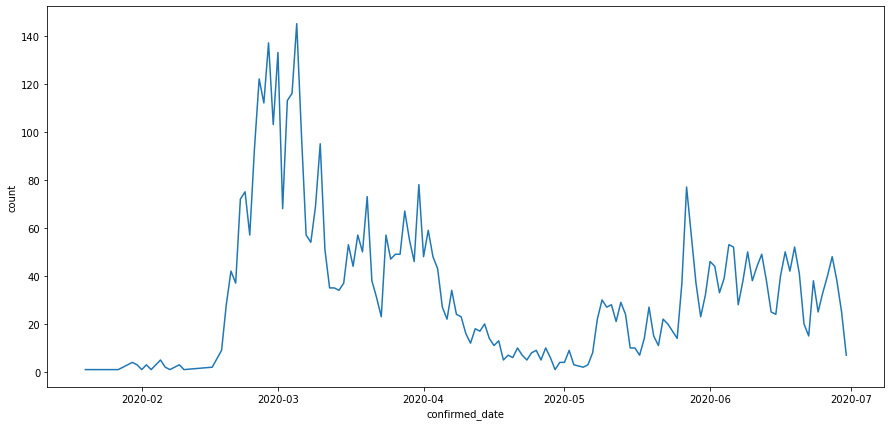

In [31]:
plt.figure(figsize = (15,7))
sns.lineplot(x = 'confirmed_date', y = 'count', data = patient)

<h3>3월에 최고치를 찍었다가 점차 줄다가 5월 중반 부터 다시 증가 하고있는 것을 볼 수 있습니다.</h3>

<h2>코로나와 배달 데이터의 연관성을 그래프로 그려보겠습니다</h2>

In [35]:
deliverycount = delivery.groupby(['Date1']).size().reset_index(name = 'count')

In [44]:
covid['month'] = pd.to_datetime(covid['confirmed_date']).dt.month
patientcount = covid.groupby(['month']).size().reset_index(name = 'count')

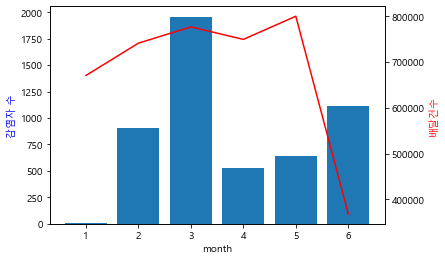

In [71]:
plt.rc('font', family = 'Malgun Gothic')

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(patientcount['month'], patientcount['count'])
ax2.plot(deliverycount['Date1'], deliverycount['count'], color = 'r')

ax1.set_xlabel('month')
ax1.set_ylabel('감염자 수', color = 'b')
ax2.set_ylabel('배달건수', color = 'r')
plt.rc('font', family = 'Malgun Gothic')
plt.show()

<h3>데이터가 완전하지 않은 6월을 제외하면 감염자 수와 유사하게 배달건수도 움직이는 것을 확인할 수 있습니다.</h3>

In [63]:
deliverytime = delivery['time1'].groupby(delivery['Date1']).mean().reset_index(name = 'count')

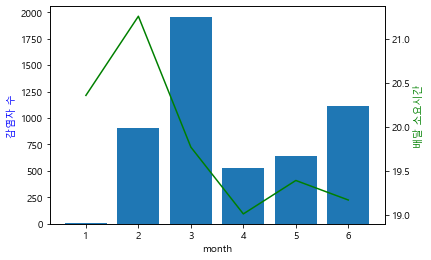

In [69]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(patientcount['month'], patientcount['count'])
ax2.plot(deliverytime['Date1'], deliverytime['count'], color = 'g')

ax1.set_xlabel('month')
ax1.set_ylabel('감염자 수', color = 'b')
ax2.set_ylabel('배달 소요시간', color = 'g')
plt.rc('font', family = 'Malgun Gothic')
plt.show()

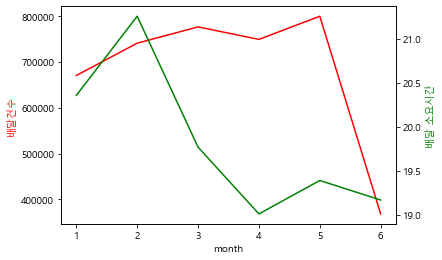

In [70]:
fig, ax2 = plt.subplots()

ax3 = ax2.twinx()
ax2.plot(deliverycount['Date1'], deliverycount['count'], color = 'r')
ax3.plot(deliverytime['Date1'], deliverytime['count'], color = 'g')

ax2.set_xlabel('month')
ax2.set_ylabel('배달건수', color = 'r')
ax3.set_ylabel('배달 소요시간', color = 'g')
plt.rc('font', family = 'Malgun Gothic')
plt.show()

<h3>배달 건수는 날이 갈수록 증가하지만 배달 소요시간은 감소하는 것을 보면 배달인원을 추가 고용하는 등의 조치를 취했을 것으로 예측할 수 있습니다.</h3>

<h1>인사이트</h1>
<h2>코로나 사태 이후로 배달 관련 산업은 더욱 더 발전할 것으로 예상할 수 있습니다.</h2>